# Data Understanding

In [1]:
# Here are all the imports needed for this phase
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('float_format', '{:f}'.format)
import warnings
warnings.filterwarnings('ignore')

In [2]:
fraud_merged_df = pd.read_csv("fraud_merged_data.csv")

In [3]:
fraud_merged_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,62421,2015-02-16 00:17:05,2015-03-08 10:00:39,46,ZCLZTAJPCRAQX,Direct,Safari,M,36,52093.496895,0,Unknown
1,173212,2015-03-08 04:03:22,2015-03-20 17:23:45,33,YFGYOALADBHLT,Ads,IE,F,30,93447.138961,0,Unknown
2,242286,2015-05-17 16:45:54,2015-05-26 08:54:34,33,QZNVQTUITFTHH,Direct,FireFox,F,32,105818.501505,0,Unknown
3,370003,2015-03-03 19:58:39,2015-05-28 21:09:13,33,PIBUQMBIELMMG,Ads,IE,M,40,117566.664867,0,Unknown
4,119824,2015-03-20 00:31:27,2015-04-05 07:31:46,55,WFIIFCPIOGMHT,Ads,Safari,M,38,131423.789042,0,Unknown


## Descriptive Statistics
### Univariate analysis
<!-- ### Bivariate analysis -->

In [4]:
fraud_merged_df["class"].value_counts()/fraud_merged_df["class"].size

0   0.906354
1   0.093646
Name: class, dtype: float64

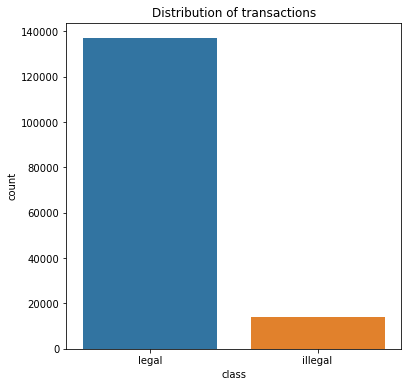

In [5]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(data=fraud_merged_df, x="class")
plt.title("Distribution of transactions")
ax.set_xticklabels(["legal", "illegal"])
plt.show()

Our dataset is unbalanced according to the target variable : there are 9% of fraudulent transactions but hopefully it reflects the reality.

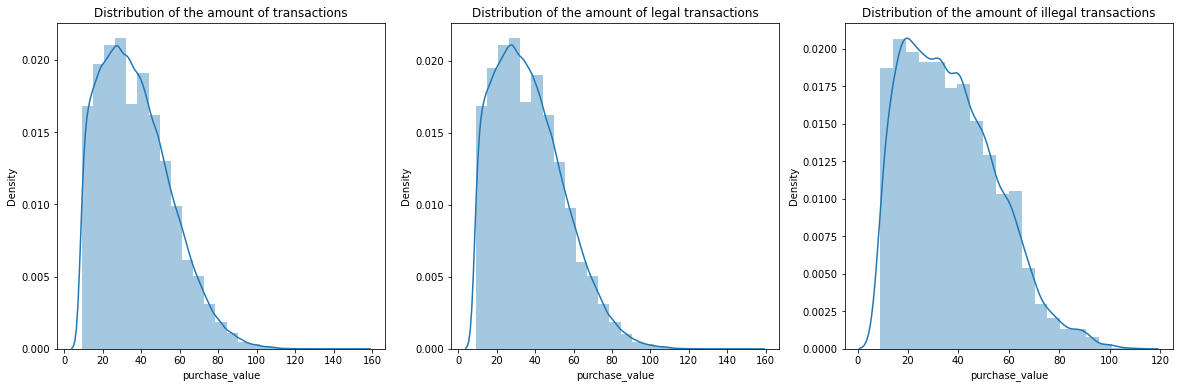

In [6]:
plt.figure(figsize=(20,6))

plt.subplot(131)
sns.distplot(
    fraud_merged_df["purchase_value"], 
    bins='doane',
    kde=True
)
plt.title("Distribution of the amount of transactions")

plt.subplot(132)
sns.distplot(
    fraud_merged_df.loc[fraud_merged_df["class"] == 0, "purchase_value"], 
    bins='doane',
    kde=True
)
plt.title("Distribution of the amount of legal transactions")

plt.subplot(133)
sns.distplot(
    fraud_merged_df.loc[fraud_merged_df["class"] == 1, "purchase_value"], 
    bins='doane',
    kde=True
)
plt.title("Distribution of the amount of illegal transactions")

plt.show()

* The distribution of the amount of transactions is quite symmetrical around an average value of 35 dollars. It is more spread out on the right, reaching values above 100 dollars.
* The distribution of the amount of legal transactions is almost identical, this is not surprising given that the proportion of legal transactions in our sample is 91%.
* The vast majority of fraudulent transactions are for amounts below 60 dollars. From about 40 dollars, there are fewer and fewer illegal transactions.

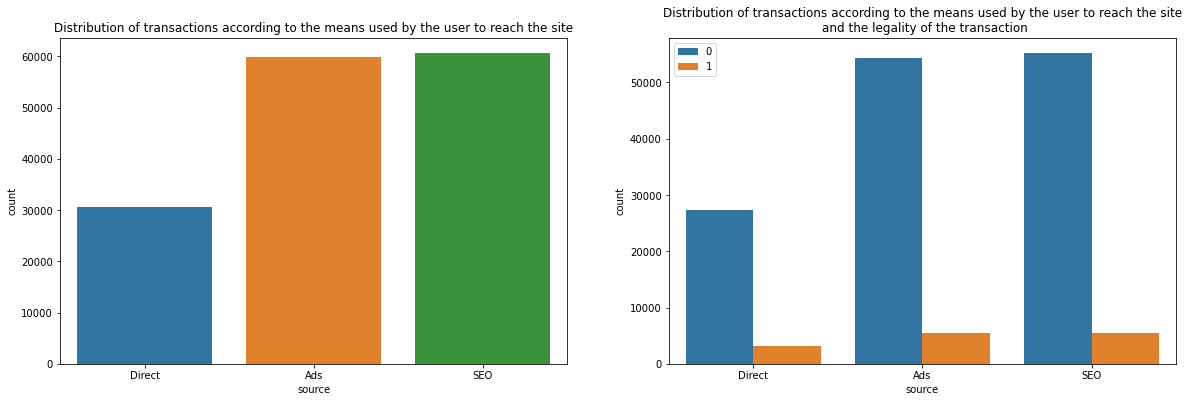

In [7]:
plt.figure(figsize=(20,6))

plt.subplot(121)
sns.countplot(data=fraud_merged_df, x="source")
plt.title("Distribution of transactions according to the means used by the user to reach the site")

plt.subplot(122)
sns.countplot(data=fraud_merged_df, x="source", hue="class")
plt.title("Distribution of transactions according to the means used by the user to reach the site\n and the legality of the transaction")
plt.legend(loc='upper left')

plt.show()

* There are twice as many transactions made by users accessing the site from advertisements and via a search engine as by users typing in the site URL directly.
* We observe that the proportions of fraudulent transactions by type of access to the site are very similar : there is a-priori no privileged means of access to commit fraud.

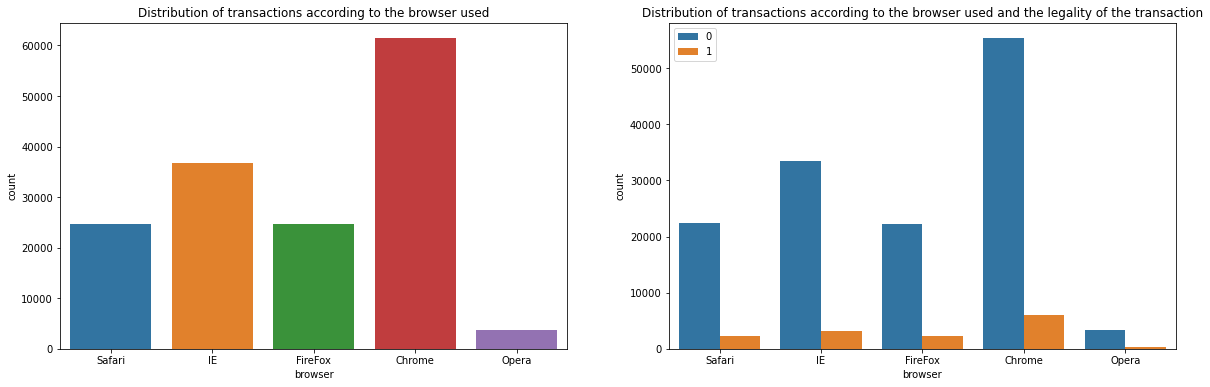

In [8]:
plt.figure(figsize=(20,6))

plt.subplot(121)
sns.countplot(data=fraud_merged_df, x="browser")
plt.title("Distribution of transactions according to the browser used")

plt.subplot(122)
sns.countplot(data=fraud_merged_df, x="browser", hue="class")
plt.title("Distribution of transactions according to the browser used and the legality of the transaction")
plt.legend(loc='upper left')

plt.show()

* The fraudulent transactions are not carried out from a specific browser : the proportions of illegal transactions according to the browser are very close to the proportions observed in the whole sample.

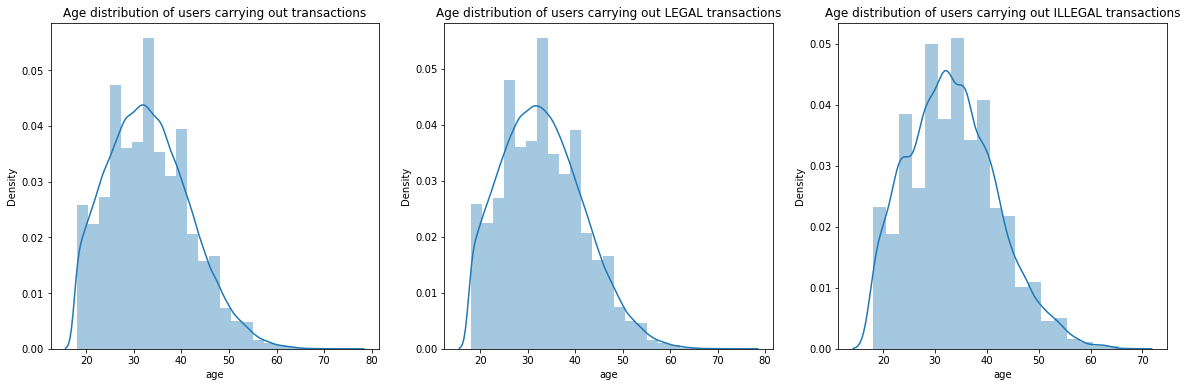

In [9]:
plt.figure(figsize=(20,6))

plt.subplot(131)
sns.distplot(
    fraud_merged_df["age"], 
    bins='doane',
    kde=True
)
plt.title("Age distribution of users carrying out transactions")

plt.subplot(132)
sns.distplot(
    fraud_merged_df.loc[fraud_merged_df["class"] == 0, "age"], 
    bins='doane',
    kde=True
)
plt.title("Age distribution of users carrying out LEGAL transactions")

plt.subplot(133)
sns.distplot(
    fraud_merged_df.loc[fraud_merged_df["class"] == 1, "age"], 
    bins='doane',
    kde=True
)
plt.title("Age distribution of users carrying out ILLEGAL transactions")

plt.show()

* The three distributions above are highly similar : the age of the user making the transaction is not sufficient to determine its nature : legal or illegal.
* The average age of the users carrying out the transaction is 33 years.

In [10]:
pd.DataFrame(fraud_merged_df["country"].value_counts()).head(15)

,country
United States,59283
Unknown,20017
China,12039
Japan,7306
United Kingdom,4490
Korea Republic of,4162
Germany,3648
France,3164
Canada,2980
Brazil,2961


In [11]:
pd.DataFrame(fraud_merged_df["country"].value_counts()).tail(15)

,country
Myanmar,1
Guadeloupe,1
Bonaire; Sint Eustatius; Saba,1
Vanuatu,1
Dominica,1
Cape Verde,1
British Indian Ocean Territory,1
Madagascar,1
Nauru,1
Yemen,1


When we look at the number of transactions per country, we notice that many countries had very few transactions compared to our sample size. In the Data Preparation phase, we will group by country. 

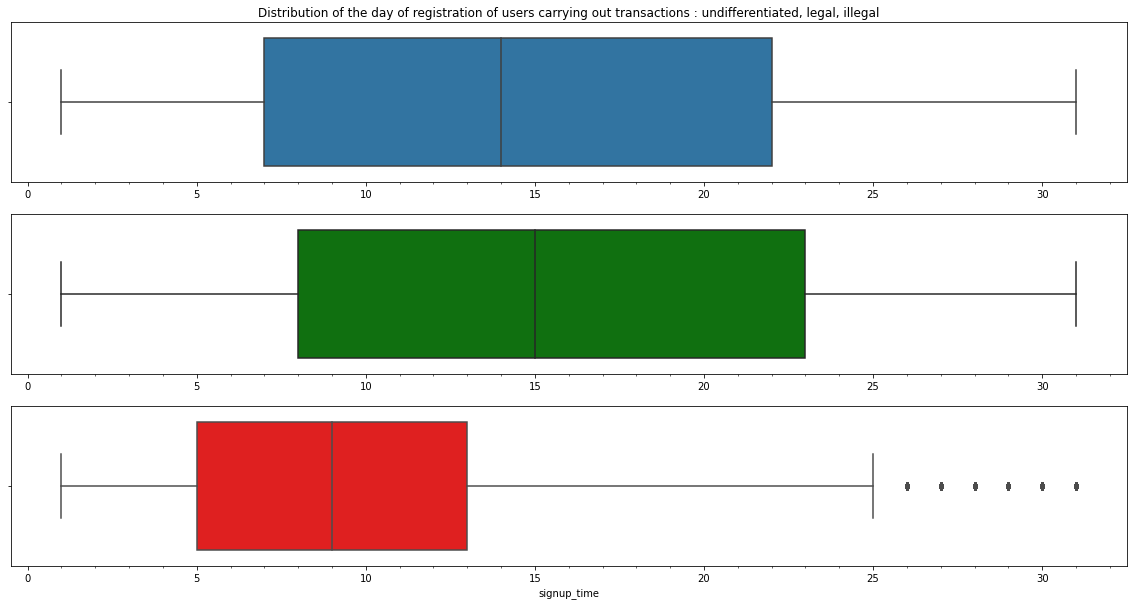

In [12]:
plt.figure(figsize=(20,10))

plt.subplot(311)
sns.boxplot(pd.to_datetime(fraud_merged_df["signup_time"]).apply(lambda x : x.day))
plt.title("Distribution of the day of registration of users carrying out transactions : undifferentiated, legal, illegal")
plt.xlabel('')
plt.minorticks_on()

plt.subplot(312)
sns.boxplot(
    pd.to_datetime(fraud_merged_df.loc[fraud_merged_df["class"] == 0, "signup_time"]).apply(lambda x : x.day), 
    color='green'
)
plt.minorticks_on()
plt.xlabel('')

plt.subplot(313)
sns.boxplot(
    pd.to_datetime(fraud_merged_df.loc[fraud_merged_df["class"] == 1, "signup_time"]).apply(lambda x : x.day), 
    color='red'
)
plt.minorticks_on()

plt.show()

For 50% of the illegal transactions, the day of registration of the account is between the 5th and 13th of the month.

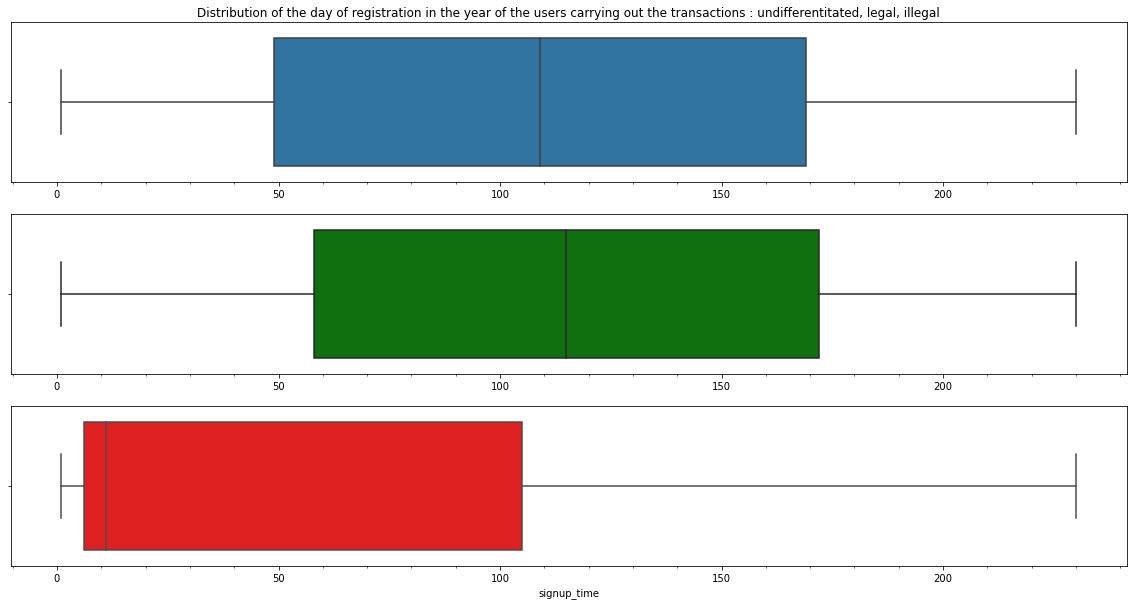

In [13]:
plt.figure(figsize=(20,10))

plt.subplot(311)
sns.boxplot(pd.to_datetime(fraud_merged_df["signup_time"]).apply(lambda x : x.dayofyear))
plt.title("Distribution of the day of registration in the year of the users carrying out the transactions : undifferentitated, legal, illegal")
plt.xlabel('')
plt.minorticks_on()

plt.subplot(312)
sns.boxplot(
    pd.to_datetime(fraud_merged_df.loc[fraud_merged_df["class"] == 0, "signup_time"]).apply(lambda x : x.dayofyear),
    color='green'
)
plt.minorticks_on()
plt.xlabel('')

plt.subplot(313)
sns.boxplot(
    pd.to_datetime(fraud_merged_df.loc[fraud_merged_df["class"] == 1, "signup_time"]).apply(lambda x : x.dayofyear), 
    color='red'
)
plt.minorticks_on()

plt.show()

* The distribution of the day of account creation in the year (between 1 and 230) for all fraudulent transactions is highly concentrated on the left (small values) : 75% of the illegal transaction accounts were created before the 105th day, i.e. before mid-April.
* 50% of the account creations performing illegal transactions were done before the 11th day, ie in the first two weeks of January.
* Considering the group of fraudulent transactions, 50% of the accounts were recorded between day 6 and day 105, ie between the second week of January and mid-April.

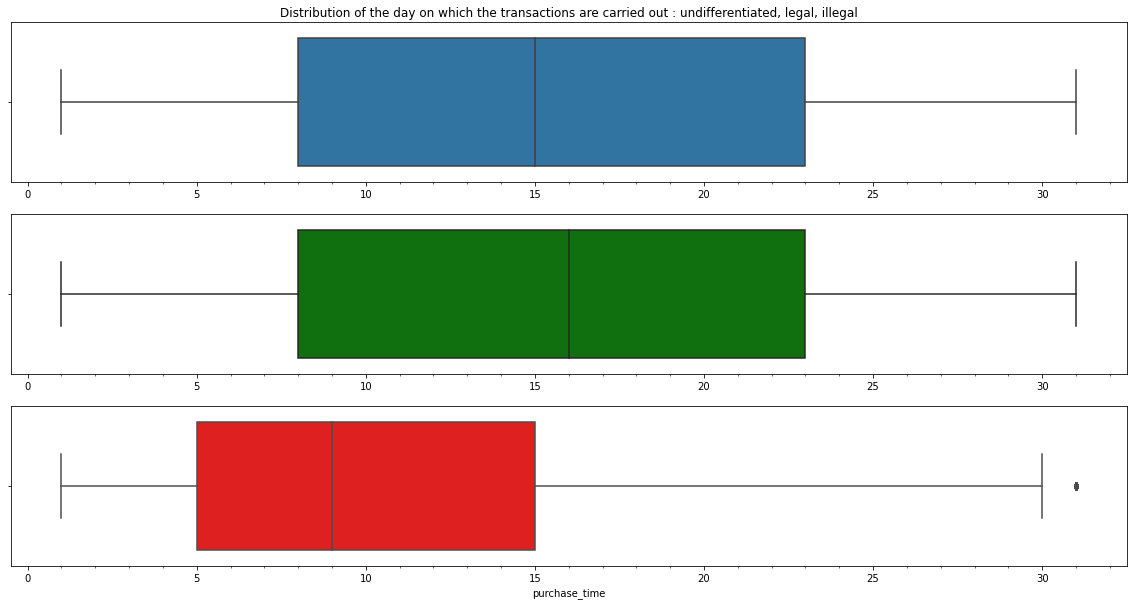

In [14]:
plt.figure(figsize=(20,10))

plt.subplot(311)
sns.boxplot(pd.to_datetime(fraud_merged_df["purchase_time"]).apply(lambda x : x.day))
plt.title("Distribution of the day on which the transactions are carried out : undifferentiated, legal, illegal")
plt.xlabel('')
plt.minorticks_on()

plt.subplot(312)
sns.boxplot(
    pd.to_datetime(fraud_merged_df.loc[fraud_merged_df["class"] == 0, "purchase_time"]).apply(lambda x : x.day),
    color='green'
)
plt.minorticks_on()
plt.xlabel('')

plt.subplot(313)
sns.boxplot(
    pd.to_datetime(fraud_merged_df.loc[fraud_merged_df["class"] == 1, "purchase_time"]).apply(lambda x : x.day),
    color='red'
)
plt.minorticks_on()

plt.show()

* 75% of fraudulent transactions took place before the 15th of the month.
* 50% of the illegal purchases were performed before the 9th of the month.

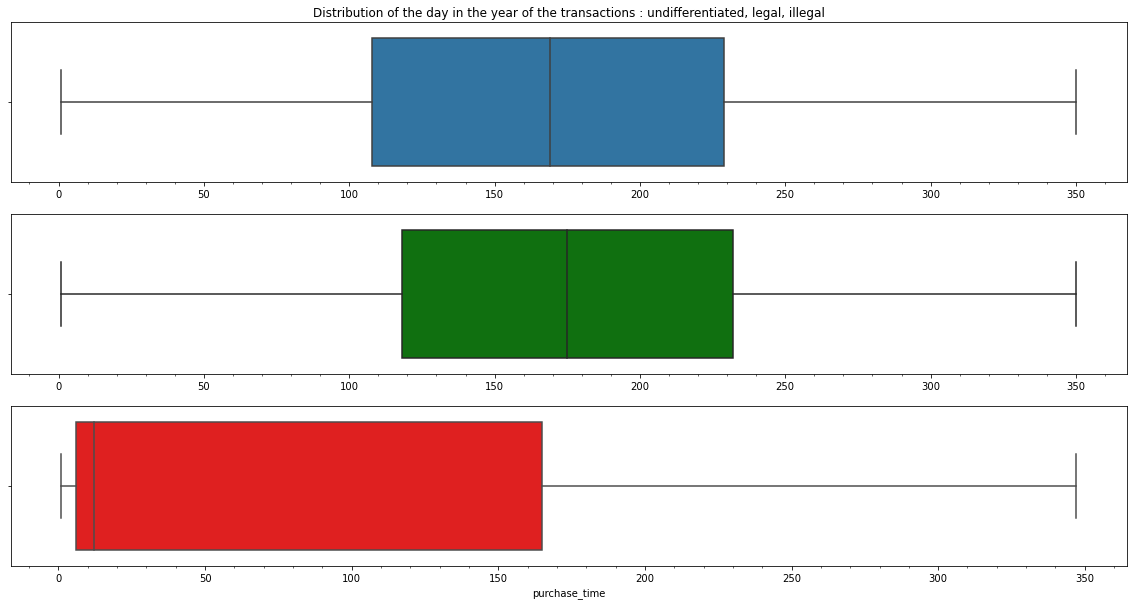

In [15]:
plt.figure(figsize=(20,10))

plt.subplot(311)
sns.boxplot(pd.to_datetime(fraud_merged_df["purchase_time"]).apply(lambda x : x.dayofyear))
plt.title("Distribution of the day in the year of the transactions : undifferentiated, legal, illegal")
plt.xlabel('')
plt.minorticks_on()

plt.subplot(312)
sns.boxplot(
    pd.to_datetime(fraud_merged_df.loc[fraud_merged_df["class"] == 0, "purchase_time"]).apply(lambda x : x.dayofyear), 
    color='green'
)
plt.minorticks_on()
plt.xlabel('')

plt.subplot(313)
sns.boxplot(
    pd.to_datetime(fraud_merged_df.loc[fraud_merged_df["class"] == 1, "purchase_time"]).apply(lambda x : x.dayofyear), 
    color='red'
)
plt.minorticks_on()

plt.show()

* The distribution of the day of purchase during the year (between 1 and 350) for all fraudulent transactions is highly concentrated on the left (low values) : 75% of illegal transactions were recorded before the 165th day, ie before mid-June.
* 50% of illegal transactions were made before the 12th day, ie in the first two weeks of January.
* 50% of fraudulent transactions were performed between day 6 and day 165, ie between the second week of January and mid-June.

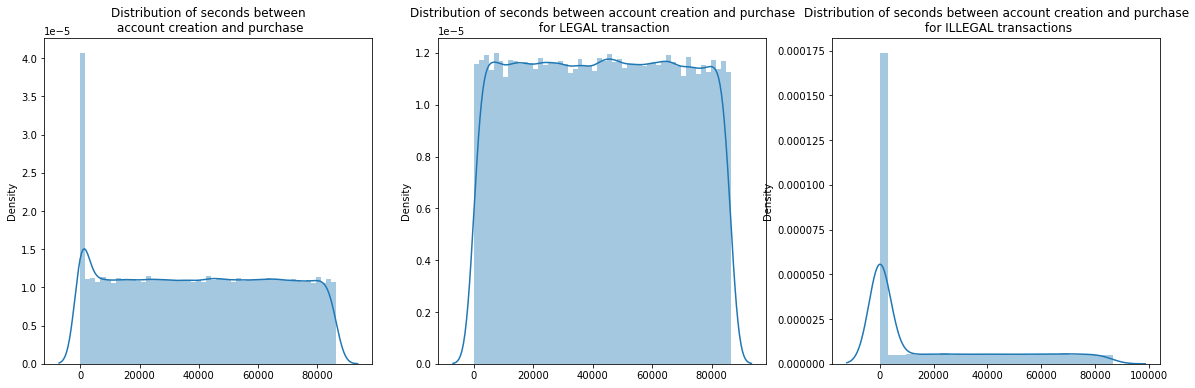

In [16]:
plt.figure(figsize=(20,6))

plt.subplot(131)
sns.distplot(
    (pd.to_datetime(fraud_merged_df["purchase_time"]) - pd.to_datetime(fraud_merged_df["signup_time"]))
    .apply(lambda x : x.seconds),
    bins='auto',
    kde=True
)
plt.title("Distribution of seconds between\n account creation and purchase")

plt.subplot(132)
sns.distplot(
    (pd.to_datetime(fraud_merged_df.loc[fraud_merged_df["class"] == 0, "purchase_time"]) - 
     pd.to_datetime(fraud_merged_df.loc[fraud_merged_df["class"] == 0, "signup_time"]))
    .apply(lambda x : x.seconds), 
    bins='auto',
    kde=True
)
plt.title("Distribution of seconds between account creation and purchase\n for LEGAL transaction")

plt.subplot(133)
sns.distplot(
    (pd.to_datetime(fraud_merged_df.loc[fraud_merged_df["class"] == 1, "purchase_time"]) - 
     pd.to_datetime(fraud_merged_df.loc[fraud_merged_df["class"] == 1, "signup_time"]))
    .apply(lambda x : x.seconds),
    bins='auto',
    kde=True
)
plt.title("Distribution of seconds between account creation and purchase\n for ILLEGAL transactions")

plt.show()

* The distribution for all legal transactions is fairly uniform : there are almost as many transactions that took place within seconds of creating an account as there are transactions that took place several months after signing up.
* The distribution for all illegal transactions is extremely concentrated on the left (values very close to 0). A significant proportion of the fraudulent purchases were carried out shortly after the user's account was created.

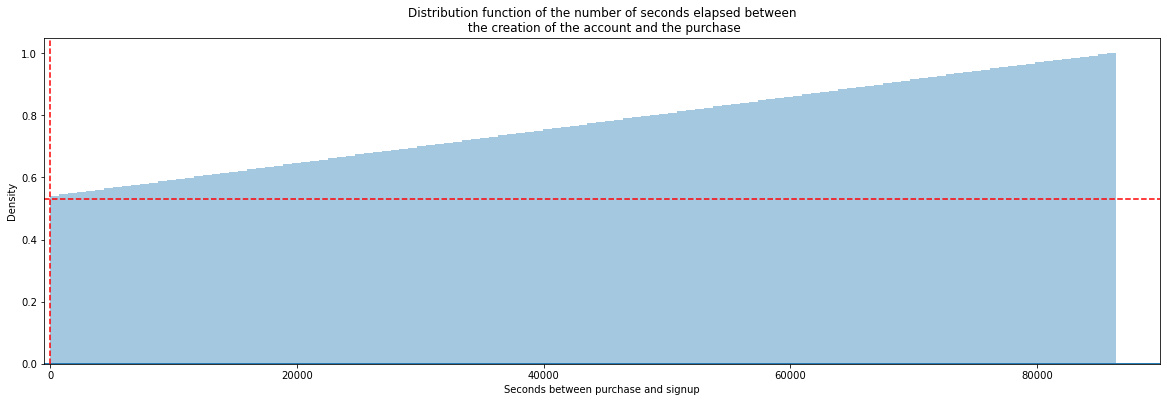

In [17]:
plt.figure(figsize=(20,6))

sns.distplot(
    (pd.to_datetime(fraud_merged_df.loc[fraud_merged_df["class"] == 1, "purchase_time"]) - 
     pd.to_datetime(fraud_merged_df.loc[fraud_merged_df["class"] == 1, "signup_time"]))
    .apply(lambda x : x.seconds),
    bins='sqrt',
    hist_kws={'cumulative': True}
)
plt.xlim([-500, 90000])
plt.axhline(y=0.53, color='r', linestyle='--')
plt.axvline(x=1, color='r', linestyle='--')
plt.xlabel("Seconds between purchase and signup")
plt.title("Distribution function of the number of seconds elapsed between\n the creation of the account and the purchase")

plt.show()

* 53% of fraudulent transactions occured within 1 second of account creation.
* For periods above this threshold, the number of illegal transactions is constant over time.

## At this stage of analysis

* We are pretty sure the source that led the user to the site, as well as the web browser used, are not sufficient to identify a transaction as fraudulent.
* We believe that the age of the user and the value of the purchase do not decide whether a transaction is illegal.
* We believe that what really plays a role in predicting whether a transaction is legal or illegal is the time between purchase and registration.
* Finally, great care must be taken with the imbalance observed in the data since it can disturb the proper functioning of the fitted models.